# selective search를 이용하여 Object Detection을 위한 Region Proposal 영역을 도출


In [ ]:
!pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4350 sha256=5fff545dcf7b4cb9ba98159bedc6426a9d7af93ff4844c8bfb2de4a115902e2a
  Stored in directory: /root/.cache/pip/wheels/83/0e/c9/4713ec9c1692e688f84fd3e80201018a02992949ca63697ba8
Successfully built selectivesearch


In [ ]:
!mkdir /content/data
!wget -O /content/data/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

mkdir: cannot create directory ‘/content/data’: File exists
--2021-07-26 22:00:33--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30102 (29K) [image/jpeg]
Saving to: ‘/content/data/audrey01.jpg’

/content/data/audre 100%[===================>]  29.40K  --.-KB/s    in 0.001s  

2021-07-26 22:00:33 (21.5 MB/s) - ‘/content/data/audrey01.jpg’ saved [30102/30102]



img shape:  (450, 375, 3)


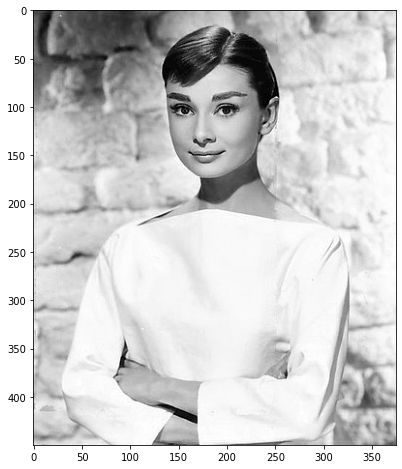

In [ ]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 오드리헵번 이미지를 cv2로 로드하고 matplotlib으로 시각화
img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape: ', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

### Parameters of selective search
- scale: object scale을 결정, 클수록 큰 object search
- min_size: 추천 object 최소 크기

In [ ]:
import selectivesearch

# selectivesearch.selective_search()는 이미지의 Region Proposal 정보를 반환
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 41


## dictionary values of regions

- rect: x, y 시작 좌표와 너비, 높이 값을 가지며 이 값이 Detected object 후보를 나타내는 Bounding box
- size: segment로 select된 Object의 크기
- labels: 해당 rect로 지정된 Bounding box내에 있는 objects의 고유 ID
- 아래로 내려갈수록 너비와 높이 값이 큰 bounding box이며 하나의 bounding box에 여러 개의 object가 있을 확률이 커짐

In [ ]:
regions

[{'labels': [0.0], 'rect': (0, 0, 107, 167), 'size': 11166},
 {'labels': [1.0], 'rect': (15, 0, 129, 110), 'size': 8771},
 {'labels': [2.0], 'rect': (121, 0, 253, 133), 'size': 17442},
 {'labels': [3.0], 'rect': (134, 17, 73, 62), 'size': 2713},
 {'labels': [4.0], 'rect': (166, 23, 87, 176), 'size': 8639},
 {'labels': [5.0], 'rect': (136, 53, 88, 121), 'size': 4617},
 {'labels': [6.0], 'rect': (232, 79, 117, 147), 'size': 7701},
 {'labels': [7.0], 'rect': (50, 91, 133, 123), 'size': 7042},
 {'labels': [8.0], 'rect': (305, 97, 69, 283), 'size': 11373},
 {'labels': [9.0], 'rect': (0, 161, 70, 46), 'size': 2363},
 {'labels': [10.0], 'rect': (72, 171, 252, 222), 'size': 34467},
 {'labels': [11.0], 'rect': (0, 181, 118, 85), 'size': 5270},
 {'labels': [12.0], 'rect': (106, 210, 89, 101), 'size': 2868},
 {'labels': [13.0], 'rect': (302, 228, 66, 96), 'size': 2531},
 {'labels': [14.0], 'rect': (0, 253, 92, 134), 'size': 7207},
 {'labels': [15.0], 'rect': (153, 270, 173, 179), 'size': 10360},


In [ ]:
# rect 정보만 출력
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 107, 167), (15, 0, 129, 110), (121, 0, 253, 133), (134, 17, 73, 62), (166, 23, 87, 176), (136, 53, 88, 121), (232, 79, 117, 147), (50, 91, 133, 123), (305, 97, 69, 283), (0, 161, 70, 46), (72, 171, 252, 222), (0, 181, 118, 85), (106, 210, 89, 101), (302, 228, 66, 96), (0, 253, 92, 134), (153, 270, 173, 179), (0, 305, 47, 139), (104, 312, 80, 71), (84, 360, 91, 67), (0, 362, 171, 87), (297, 364, 77, 85), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (84, 312, 100, 115), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]


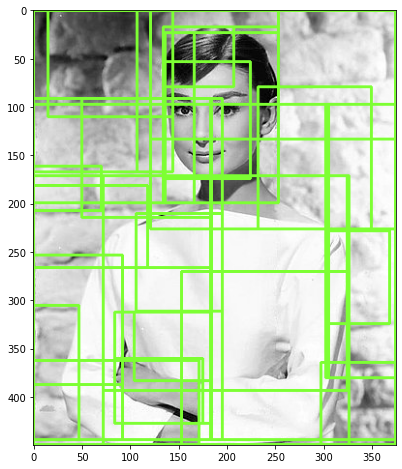

In [ ]:
# opencv의 rectangle()을 이용하여 bounding box 시각화
# rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box 컬러색, 두께 등을 인자로 입력하면 원본 이미지에 box를 그려줌

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:
  
  left = rect[0]
  top = rect[1]

  # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표값에 각각을 더함
  right = left + rect[2]
  bottom = top + rect[3]
  
  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

### bounding box 크기가 큰 후보만 추출

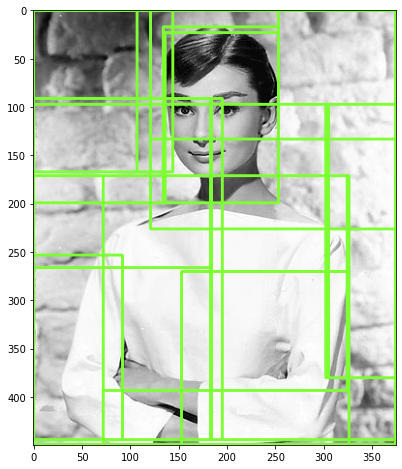

In [ ]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()

for rect in cand_rects:

  left = rect[0]
  top = rect[1]
  right = left + rect[2]
  bottom = top + rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

## selectivesearch scale 값에 따른 차이

In [34]:
def selectivesearch_scale(img, scales):
  import selectivesearch

  for scale in scales:

    _, regions = selectivesearch.selective_search(img, scale=scale, min_size=2000)
    print('scale: ', scale)
    print('number: ', len(regions))

    cand_rects = [cand['rect'] for cand in regions]

    green_rgb = (125, 255, 51)
    img_copy = img.copy()

    for rect in cand_rects:

      left = rect[0]
      top = rect[1]
      right = left + rect[2]
      bottom = top + rect[3]

      img_copy = cv2.rectangle(img_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)

    plt.figure(figsize=(8, 8))
    plt.imshow(img_copy)
    plt.show()
    print()

img shape:  (450, 375, 3)


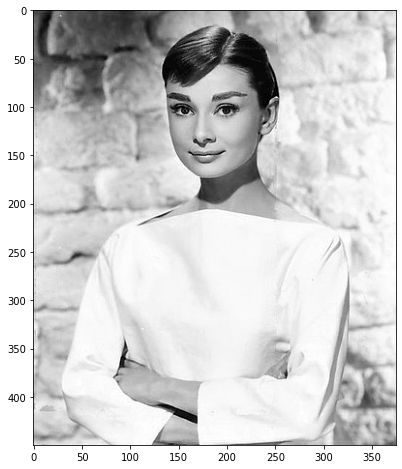

scale:  100
number:  41


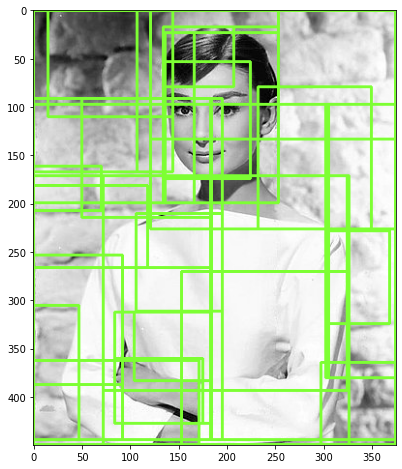


scale:  300
number:  24


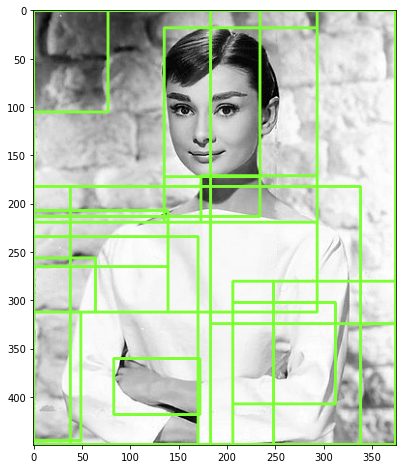


scale:  500
number:  18


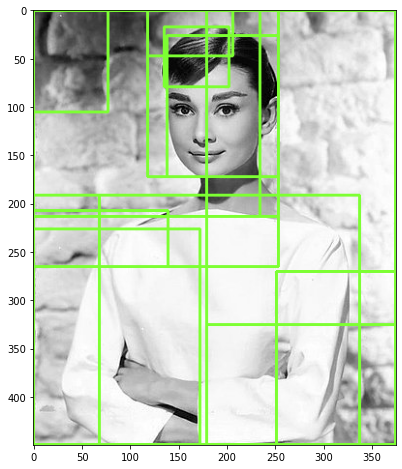


scale:  1000
number:  9


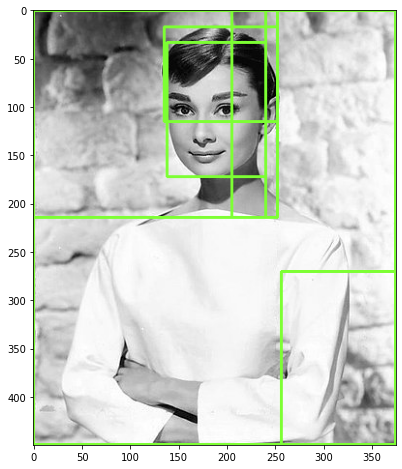

In [ ]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 오드리헵번 이미지를 cv2로 로드하고 matplotlib으로 시각화
img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape: ', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

selectivesearch_scale(img_rgb, [100, 300, 500, 1000])

## Metric - IOU(Intersection Over Union) 구하기

**입력인자로 후보 박스와 실제 박스를 받아서 IOU를 계산하는 함수 생성**

- IOU = area of overlap / area of union

In [53]:
import numpy as np

def compute_iou(cand_box, gt_box):

  # calculate intersection areas
  x1 = np.maximum(cand_box[0], gt_box[0])
  y1 = np.maximum(cand_box[1], gt_box[1])
  x2 = np.minimum(cand_box[2], gt_box[2])
  y2 = np.minimum(cand_box[3], gt_box[3])

  intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
  cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
  gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
  union = cand_box_area + gt_box_area - intersection

  iou = intersection / union
  return iou

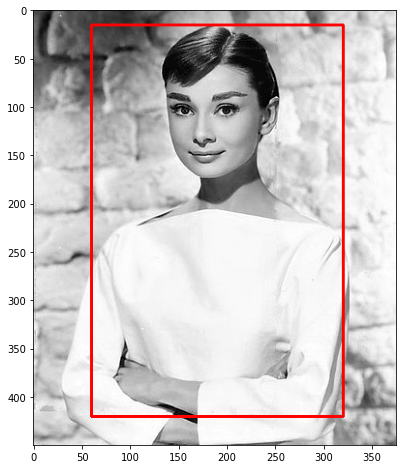

In [54]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# gt(ground truth) box 좌표를 아래와 같다고 가정
gt_box = [60, 15, 320, 420]

img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0, 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [66]:
def selectivesearch_iou(img, scales, minSize):
  import selectivesearch

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  for scale in scales:
    img_copy = img.copy()

    _, regions = selectivesearch.selective_search(img_copy, scale=scale, min_size=minSize)
    print('scale: ', scale)

    cand_rects = [cand['rect'] for cand in regions]

    green_rgb = (125, 255, 51)
    red = (255, 0, 0)
    # gt(ground truth) box 좌표를 아래와 같다고 가정
    gt_box = [60, 15, 320, 420]
    img_copy = cv2.rectangle(img_copy, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

    for idx, cand_box in enumerate(cand_rects):

      cand_box = list(cand_box)
      cand_box[2] += cand_box[0]
      cand_box[3] += cand_box[1]

      iou = compute_iou(cand_box, gt_box)

      if iou > 0.2:
        print('index: ', idx, 'iou: ', iou, 'rectangle: ', (cand_box[0], cand_box[1], cand_box[2], cand_box[3]))
        cv2.rectangle(img_copy, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=1)
        text = "{}: {:.2f}".format(idx, iou)
        cv2.putText(img_copy, text, (cand_box[0] + 100, cand_box[1] + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)

    plt.figure(figsize=(12, 12))
    plt.imshow(img_copy)
    plt.show()
    print()

scale:  100
index:  2 iou:  0.2033654637255666 rectangle:  (121, 0, 374, 133)
index:  8 iou:  0.4748007865052261 rectangle:  (72, 171, 368, 393)
index:  11 iou:  0.22523535071077264 rectangle:  (153, 270, 326, 449)
index:  15 iou:  0.205679012345679 rectangle:  (134, 17, 253, 199)
index:  17 iou:  0.31286601312432816 rectangle:  (0, 270, 326, 449)
index:  18 iou:  0.34848824374009246 rectangle:  (121, 0, 374, 226)
index:  19 iou:  0.6052570825500478 rectangle:  (72, 97, 374, 393)
index:  20 iou:  0.2507859144632631 rectangle:  (0, 0, 183, 266)
index:  22 iou:  0.30313273580879213 rectangle:  (15, 0, 253, 199)
index:  23 iou:  0.3452168935249968 rectangle:  (0, 253, 326, 449)
index:  24 iou:  0.46773314985235515 rectangle:  (0, 0, 374, 266)
index:  25 iou:  0.5490037131949166 rectangle:  (0, 97, 374, 449)
index:  26 iou:  0.46773314985235515 rectangle:  (0, 0, 374, 266)
index:  27 iou:  0.5490037131949166 rectangle:  (0, 97, 374, 449)
index:  28 iou:  0.6270619201314865 rectangle:  (0, 

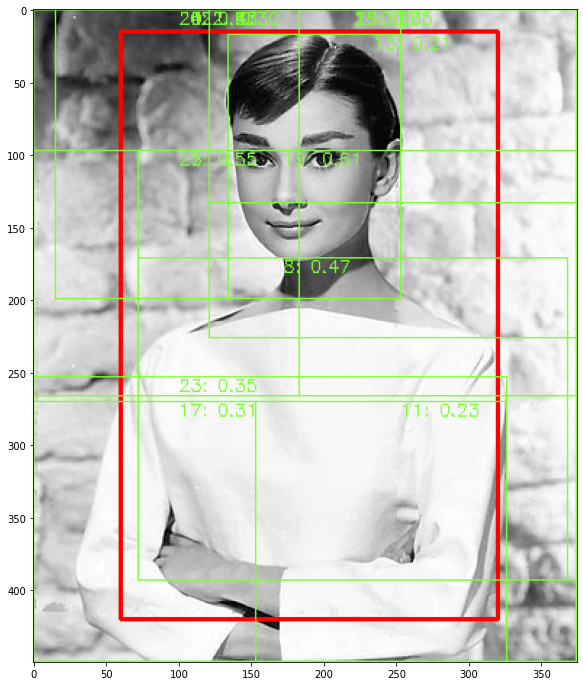


scale:  300
index:  1 iou:  0.2854586129753915 rectangle:  (0, 0, 234, 213)
index:  2 iou:  0.33906816925775524 rectangle:  (183, 0, 374, 324)
index:  4 iou:  0.4812524159257828 rectangle:  (0, 171, 338, 449)
index:  11 iou:  0.2854586129753915 rectangle:  (0, 0, 234, 213)
index:  12 iou:  0.4812524159257828 rectangle:  (0, 171, 338, 449)
index:  13 iou:  0.40925988758906573 rectangle:  (183, 0, 374, 449)
index:  14 iou:  0.3513448025199903 rectangle:  (0, 0, 234, 265)
index:  15 iou:  0.4812524159257828 rectangle:  (0, 171, 338, 449)
index:  16 iou:  0.6270619201314865 rectangle:  (0, 0, 374, 449)
index:  17 iou:  0.6270619201314865 rectangle:  (0, 0, 374, 449)


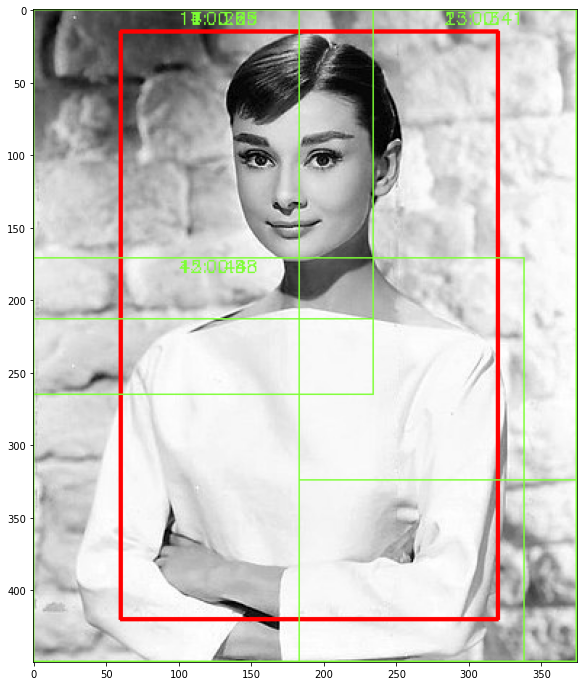


scale:  500
index:  1 iou:  0.2854586129753915 rectangle:  (0, 0, 234, 213)
index:  2 iou:  0.3497779378225903 rectangle:  (179, 0, 374, 325)
index:  4 iou:  0.4932560644135597 rectangle:  (68, 191, 337, 449)
index:  8 iou:  0.3158834469931804 rectangle:  (0, 0, 253, 213)
index:  9 iou:  0.42066298342541436 rectangle:  (179, 0, 374, 449)
index:  10 iou:  0.38881502075023167 rectangle:  (0, 0, 253, 265)
index:  11 iou:  0.44866094976866155 rectangle:  (0, 191, 337, 449)
index:  12 iou:  0.6270619201314865 rectangle:  (0, 0, 374, 449)
index:  13 iou:  0.6270619201314865 rectangle:  (0, 0, 374, 449)


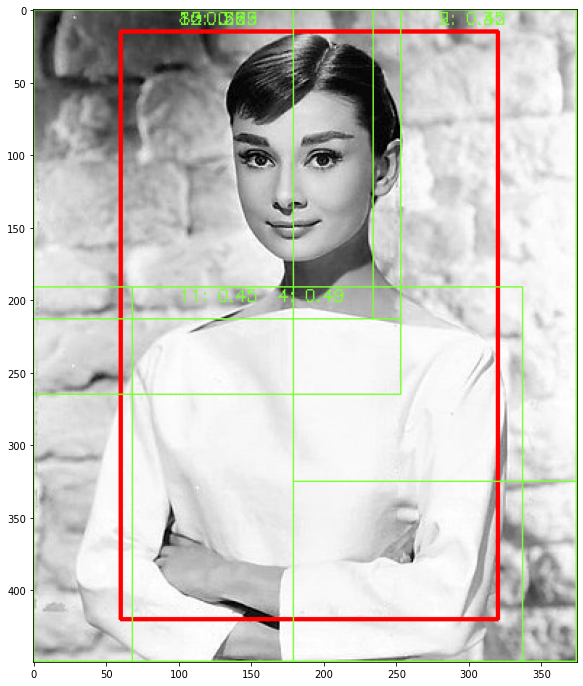


scale:  1000
index:  0 iou:  0.23982878277853967 rectangle:  (0, 0, 205, 214)
index:  1 iou:  0.6270619201314865 rectangle:  (0, 0, 374, 449)
index:  5 iou:  0.29642502482621647 rectangle:  (0, 0, 240, 214)
index:  6 iou:  0.3157164105106594 rectangle:  (0, 0, 252, 214)
index:  7 iou:  0.6270619201314865 rectangle:  (0, 0, 374, 449)
index:  8 iou:  0.6270619201314865 rectangle:  (0, 0, 374, 449)


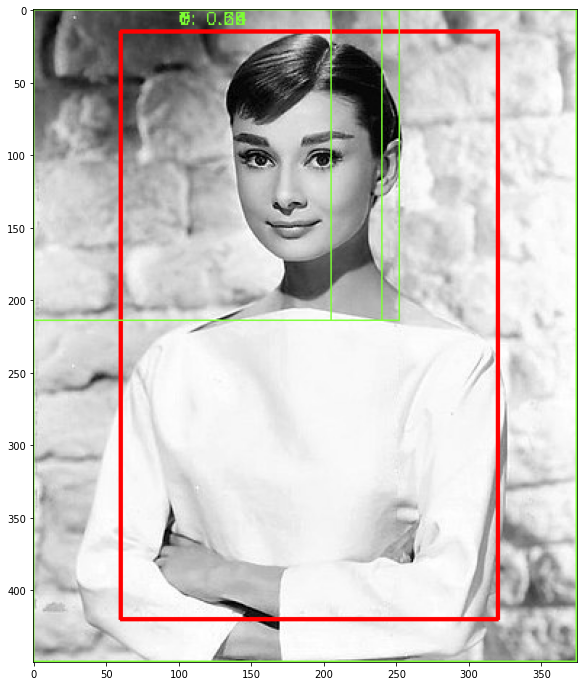

In [67]:
selectivesearch_iou(img, [100, 300, 500, 1000], 3000)